## ML Project

We start by importing all the required libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("social_media_vs_productivity.csv")
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,NaN,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,NaN,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,NaN,Telegram,66,6.214096,8.868753,NaN,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,NaN
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


### Basic Analysis of Dataset

In [4]:
# data on all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [5]:
# statistics of all features
df.describe()

,age,daily_social_media_time,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
count,30000.000000,27235.000000,30000.000000,30000.000000,28386.000000,27635.000000,28096.000000,27402.000000,27789.000000,30000.000000,30000.000000,30000.000000,30000.000000,27270.000000
mean,41.486867,3.113418,59.958767,6.990792,5.510488,4.951805,5.514059,6.500247,1.025568,4.992200,1.999300,15.557067,10.360655,4.964901
std,13.835221,2.074813,7.723772,1.997736,2.023470,1.883378,2.866344,1.464004,0.653355,3.173737,1.410047,9.252956,7.280415,2.121194
min,18.000000,0.000000,30.000000,0.000000,2.000252,0.296812,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.639566,55.000000,5.643771,3.757861,3.373284,3.000000,5.493536,0.528490,2.000000,1.000000,8.000000,4.541872,3.363580
50%,41.000000,3.025913,60.000000,6.990641,5.525005,4.951742,6.000000,6.498340,1.006159,5.000000,2.000000,16.000000,10.013677,4.951049
75%,53.000000,4.368917,65.000000,8.354725,7.265776,6.526342,8.000000,7.504143,1.477221,8.000000,3.000000,24.000000,15.300809,6.581323
max,65.000000,17.973256,90.000000,12.000000,8.999376,9.846258,10.000000,10.000000,3.000000,10.000000,10.000000,31.000000,40.964769,10.000000


### Checking for null values

In [6]:
df.isnull().sum()

age                                  0
gender                               0
job_type                             0
daily_social_media_time           2765
social_platform_preference           0
number_of_notifications              0
work_hours_per_day                   0
perceived_productivity_score      1614
actual_productivity_score         2365
stress_level                      1904
sleep_hours                       2598
screen_time_before_sleep          2211
breaks_during_work                   0
uses_focus_apps                      0
has_digital_wellbeing_enabled        0
coffee_consumption_per_day           0
days_feeling_burnout_per_month       0
weekly_offline_hours                 0
job_satisfaction_score            2730
dtype: int64

In [7]:
# Numerical columns to fill with mean
num_cols = ['daily_social_media_time', 'perceived_productivity_score', 
            'actual_productivity_score',
            'sleep_hours', 'screen_time_before_sleep', 'job_satisfaction_score']

# Fill numerical columns with mean
for col in num_cols:
    mean_val = df[col].mean()  # calculate mean
    df[col].fillna(mean_val, inplace=True)

# Categorical columns to fill with mode
cat_cols = ['gender', 'job_type', 'social_platform_preference', 'stress_level']

# Fill categorical columns with mode
for col in cat_cols:
    mode_val = df[col].mode()[0]  # calculate mode
    df[col].fillna(mode_val, inplace=True)

# Verify no missing values remain
print(df.isnull().sum())


age                               0
gender                            0
job_type                          0
daily_social_media_time           0
social_platform_preference        0
number_of_notifications           0
work_hours_per_day                0
perceived_productivity_score      0
actual_productivity_score         0
stress_level                      0
sleep_hours                       0
screen_time_before_sleep          0
breaks_during_work                0
uses_focus_apps                   0
has_digital_wellbeing_enabled     0
coffee_consumption_per_day        0
days_feeling_burnout_per_month    0
weekly_offline_hours              0
job_satisfaction_score            0
dtype: int64


/tmp/ipykernel_9694/1312118522.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)
/tmp/ipykernel_9694/1312118522.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [8]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,4.964901
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


### Checking existence of duplicates:

In [9]:
df = df.drop_duplicates()
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,4.964901
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,1,5,4.180940,0,61,6.753558,8.040464,7.291555,3,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,1,2,3.249603,4,59,9.169296,5.063368,5.165093,6,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,1,1,3.113418,4,57,7.910952,3.861762,3.474053,3,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,0,5,3.113418,0,59,6.355027,2.916331,1.774869,5,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,1,3,3.113418,2,66,6.214096,8.868753,4.951805,6,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,0,2,1.877297,0,59,10.226358,3.348512,3.465815,7,5.480462,1.412655,9,False,False,4,5,21.776927,4.964901
29996,39,1,2,4.437784,1,46,4.692862,8.133213,6.659294,7,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,1,0,17.724981,3,64,10.915036,8.611005,8.658912,4,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,0,0,3.796634,1,56,6.937410,7.767076,6.895583,7,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [11]:
print(df.head())
print(df.isnull().sum())


   age  gender  job_type  daily_social_media_time  social_platform_preference  \
0   56       1         5                 4.180940                           0   
1   46       1         2                 3.249603                           4   
2   32       1         1                 3.113418                           4   
3   60       0         5                 3.113418                           0   
4   25       1         3                 3.113418                           2   

   number_of_notifications  work_hours_per_day  perceived_productivity_score  \
0                       61            6.753558                      8.040464   
1                       59            9.169296                      5.063368   
2                       57            7.910952                      3.861762   
3                       59            6.355027                      2.916331   
4                       66            6.214096                      8.868753   

   actual_productivity_score  st

### Outlier Detection and Removal

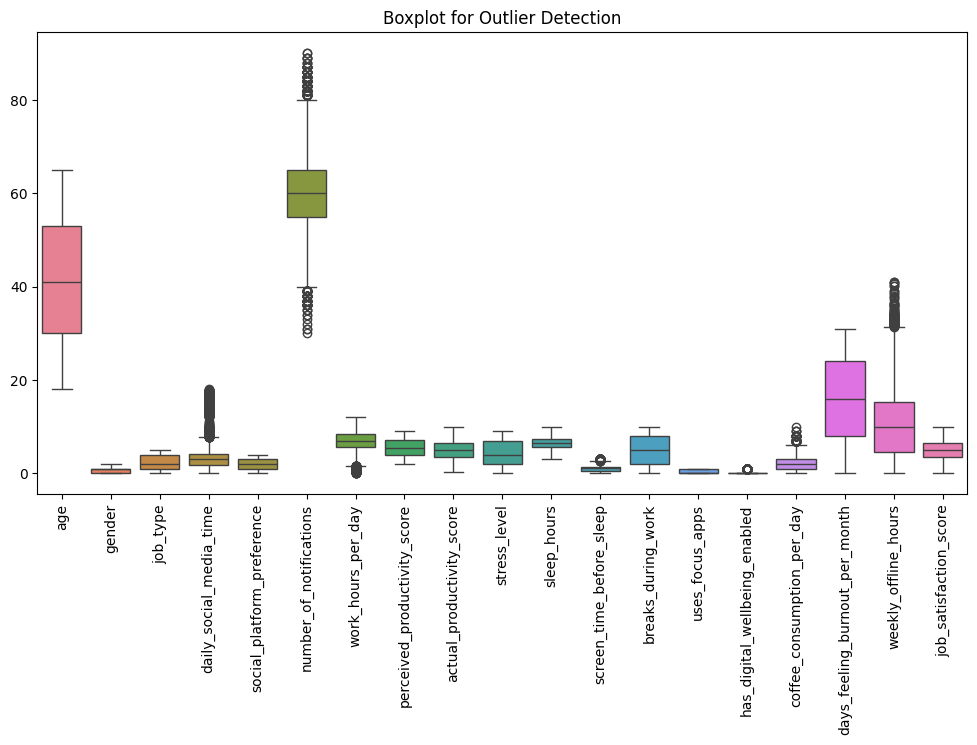

In [12]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


We notice a few outliers in the boxplot. Capping can be done to ensure the outliers do not affect the model.

We also notice that the ranges of some features are quite large compared to others. Standardization can be done later to make sure all features lie between -1 and 1.

In [13]:
## Capping outliers based on IQR for numerical columns
# for column in df.columns:
#     if column != 'stress_level':
#         Q1 = df[column].quantile(0.25)
#         Q3 = df[column].quantile(0.75)
#         IQR = Q3 - Q1
#         lower_cap = Q1 - 1.5 * IQR
#         upper_cap = Q3 + 1.5 * IQR
#         df[column] = np.where(df[column] < lower_cap, int(lower_cap), df[column])
#         df[column] = np.where(df[column] > upper_cap, int(upper_cap), df[column])

# print("\nSummary of data after capping outliers:")
# df.describe()

import numpy as np

# Select numeric columns (excluding target 'stress_level' if you want)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('stress_level')  # optional, keep target uncapped

# Capping outliers
for column in num_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_cap = Q1 - 1.5 * IQR
    upper_cap = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_cap, lower_cap, df[column])
    df[column] = np.where(df[column] > upper_cap, upper_cap, df[column])

print("\nSummary of numeric data after capping outliers:")
print(df[num_cols].describe())



Summary of numeric data after capping outliers:
                age        gender      job_type  daily_social_media_time  \
count  30000.000000  30000.000000  30000.000000             30000.000000   
mean      41.486867      0.560267      2.493233                 3.074948   
std       13.835221      0.570011      1.709167                 1.810313   
min       18.000000      0.000000      0.000000                 0.000000   
25%       30.000000      0.000000      1.000000                 1.797748   
50%       41.000000      1.000000      2.000000                 3.113418   
75%       53.000000      1.000000      4.000000                 4.219533   
max       65.000000      2.000000      5.000000                 7.852210   

       social_platform_preference  number_of_notifications  \
count                30000.000000             30000.000000   
mean                     2.005867                59.946667   
std                      1.409999                 7.647695   
min               

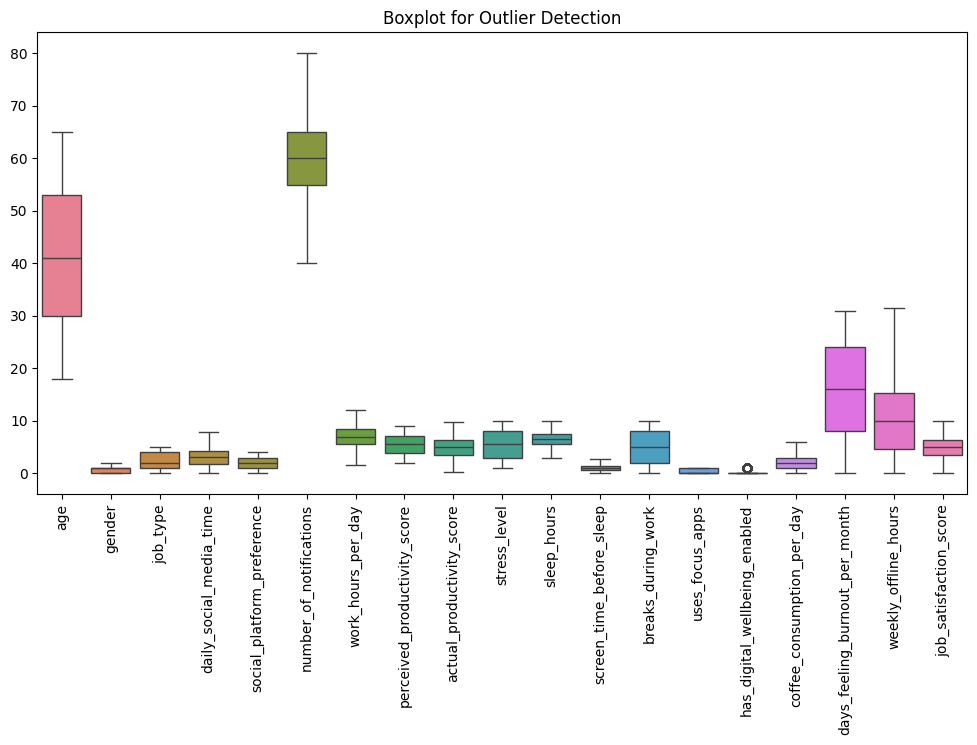

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

### Exploratory Data Analysis

#### Univariate Analysis

In [ ]:
# plotting distribution of values across each feature
colors = ['k', 'r', 'c', 'g']
plt.figure(figsize=(15, 20))
for i in range(len(df.columns)-1):
    plt.subplot(7, 3, i+1)
    plt.title(" ".join(df.columns[i].split('_')).title())
    plt.xticks(rotation=90)
    sns.countplot(x=df[df.columns[i]], color=colors[i % len(colors)])
plt.tight_layout()
plt.show()

##### We see that the target variable is balanced since we have almost equal number of datapoints pread across all 3 classes

In [ ]:
sns.countplot(x=df['stress_level'], color='c')
plt.title('Stress Levels')
plt.show()

#### Bivariate Analysis

In [ ]:
# plotting count of each variable vs target
palette = ['Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Pastel1', 'Pastel2', 'Dark2']
plt.figure(figsize=(15, 20))
for i in range(len(df.columns)-1):
    plt.subplot(7, 3, i+1)
    plt.title(" ".join(df.columns[i].split('_')).title())
    sns.countplot(x=df.columns[i], hue='stress_level', data=df, edgecolor='black', palette=palette[i % len(palette)])
    plt.xticks(rotation=90)
plt.legend(fontsize=7)
plt.tight_layout()
plt.show()

In [ ]:
# plotting violin plots of each feature vs target to see the data distribution against target for each feature 
palette = ['Set1', 'Set2', 'Set3', 'Paired', 'Accent', 'Pastel1', 'Pastel2', 'Dark2']
plt.figure(figsize=(15, 20))
for i in range(len(df.columns)-1):
    plt.subplot(7, 3, i+1)
    plt.title(" ".join(df.columns[i].split('_')).title())
    sns.violinplot(data=df, y=df.columns[i], x='stress_level')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From the violinplots, it can be inferred that anxiety level, self esteem, depression, sleep quality, future career concerns and bullying show most variance between stress levels.

#### Multivariate Analysis

We plot the heatmap for the dataset to see the correlation between features

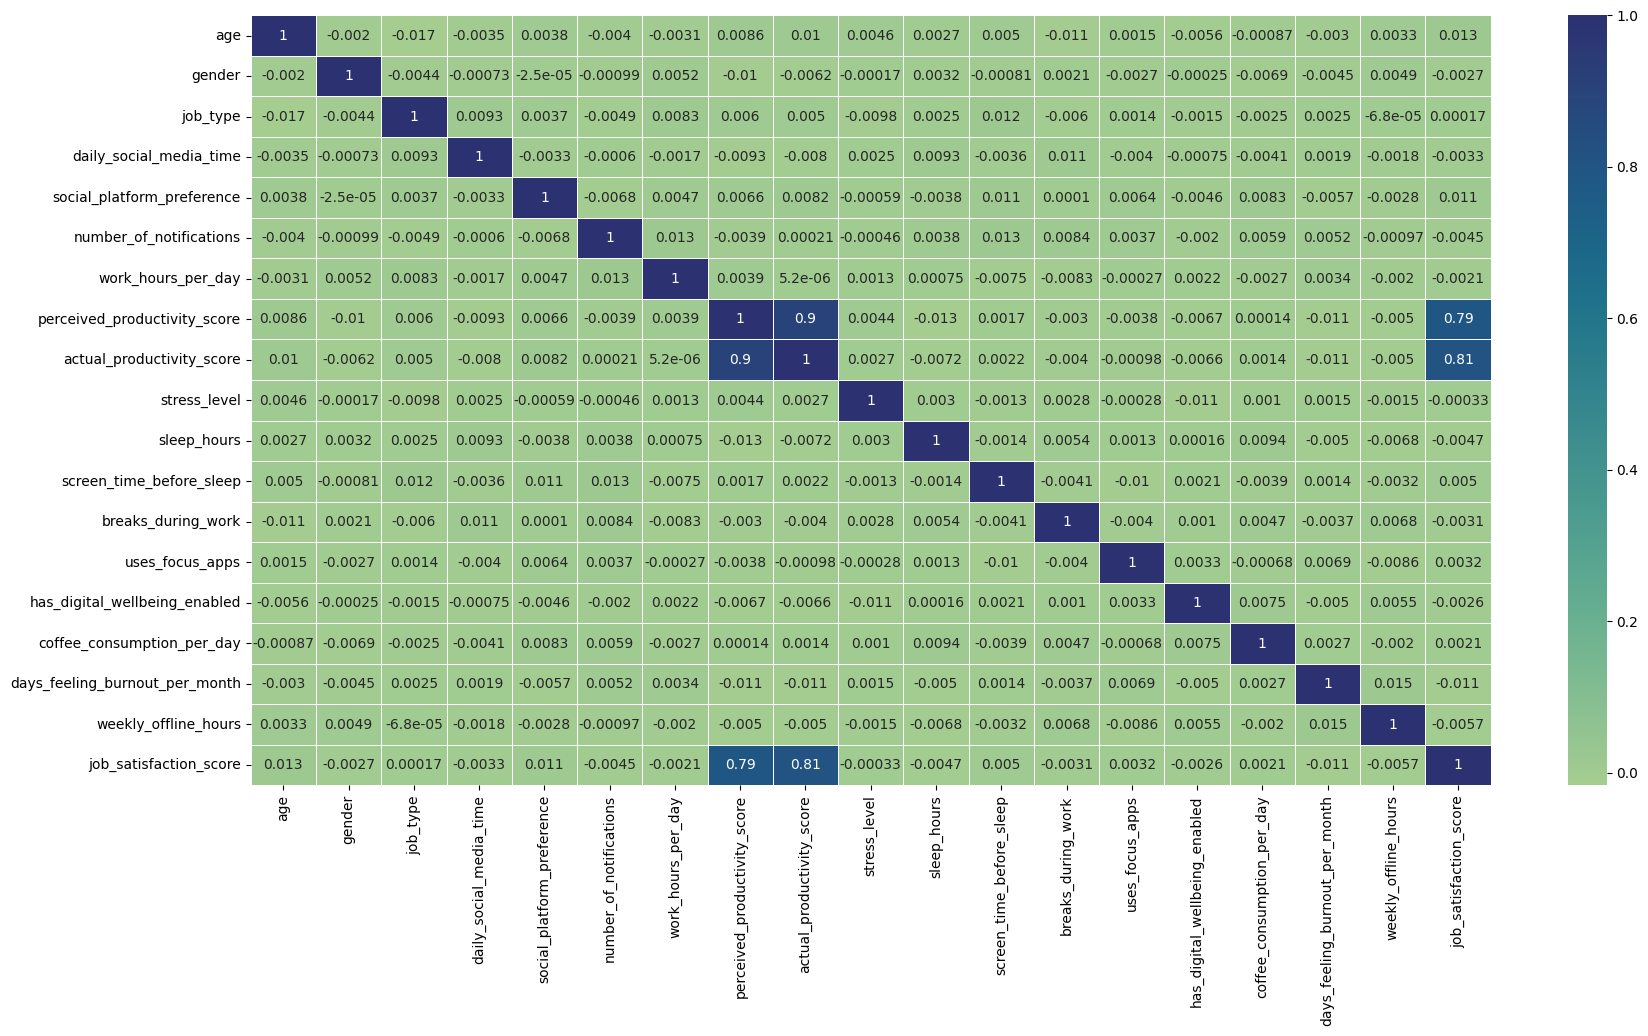

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap='crest')
plt.show()

We see that there are many features with correlation of above 0.7 to stress levels but the most prominent ones with correlation of >= 0.75 are self esteem, bullying and sleep quality. The highest correlation between any two features is between blood pressure and social support with a correlation of 75%. No two features are too correlated.

On checking whether the dataset is skewed for any feature, we see that none are too skewed, self esteem has the highest skew with a negative skew of 0.39

In [15]:


df.skew().sort_values()

work_hours_per_day               -0.018802
perceived_productivity_score     -0.011469
days_feeling_burnout_per_month   -0.007784
social_platform_preference       -0.007322
actual_productivity_score        -0.007051
job_type                          0.001724
sleep_hours                       0.004183
breaks_during_work                0.006698
job_satisfaction_score            0.009659
age                               0.015305
number_of_notifications           0.084381
stress_level                      0.125610
daily_social_media_time           0.270160
screen_time_before_sleep          0.284237
weekly_offline_hours              0.392190
gender                            0.399091
coffee_consumption_per_day        0.572749
uses_focus_apps                   0.869282
has_digital_wellbeing_enabled     1.175842
dtype: float64

Exploring how correlated each feature is with the target:

In [16]:
df.corr()['stress_level'].sort_values()

has_digital_wellbeing_enabled    -0.011205
job_type                         -0.009849
weekly_offline_hours             -0.001548
screen_time_before_sleep         -0.001292
social_platform_preference       -0.000594
number_of_notifications          -0.000458
job_satisfaction_score           -0.000332
uses_focus_apps                  -0.000280
gender                           -0.000174
coffee_consumption_per_day        0.001020
work_hours_per_day                0.001315
days_feeling_burnout_per_month    0.001512
daily_social_media_time           0.002498
actual_productivity_score         0.002728
breaks_during_work                0.002769
sleep_hours                       0.003044
perceived_productivity_score      0.004360
age                               0.004630
stress_level                      1.000000
Name: stress_level, dtype: float64

### Standardization of the Features

In [17]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
for col in df.columns:
    if col != 'stress_level':
        df[col] = sc.fit_transform(np.array(df[col]).reshape(-1, 1))

In [18]:
df

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,1.049017,0.771460,1.466684,0.610949,-1.422625,0.137734,-0.119901,1.285392,1.294407,3,-0.988958,-0.967390,0.947731,-0.655745,-0.572116,1.441969,-0.492507,1.596507,6.783167e-01
1,0.326212,0.771460,-0.288586,0.096479,1.414303,-0.123787,1.092381,-0.227166,0.117996,6,-0.997998,-0.564076,0.632640,1.524983,1.747899,0.004456,1.020549,-1.427672,-7.676618e-01
2,-0.685715,0.771460,-0.873676,0.021251,1.414303,-0.385308,0.460910,-0.837660,-0.817528,3,1.488741,-0.639399,-1.572998,1.524983,-0.572116,0.723212,0.155946,-0.004057,-1.231226e+00
3,1.338138,-0.982922,1.466684,0.021251,-1.422625,-0.123787,-0.319895,-1.318001,-1.757558,5,-0.319667,0.287592,-1.257907,-0.655745,-0.572116,-1.433056,-1.249034,1.865388,-1.597768e+00
4,-1.191679,0.771460,0.296504,0.021251,-0.004161,0.791537,-0.390618,1.706217,0.000000,6,-0.782289,1.360864,-1.257907,-0.655745,1.747899,-0.714300,1.560925,0.041660,2.337964e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,-0.541154,-0.982922,-0.288586,-0.661582,-1.422625,-0.123787,1.622844,-1.098424,-0.822086,7,-0.728860,0.620121,1.262822,-0.655745,-0.572116,1.441969,-1.140959,1.575799,-8.783668e-16
29996,-0.179752,0.771460,-0.288586,0.752830,-0.713393,-1.823674,-1.154014,1.332515,0.944625,7,-2.469249,-1.399065,-0.627725,-0.655745,-0.572116,-0.714300,1.452850,-0.860632,5.887793e-01
29997,0.037090,0.771460,-1.458766,2.638958,0.705071,0.530016,1.968441,1.575264,2.050861,4,-0.720956,0.319159,1.577914,-0.655745,-0.572116,-0.714300,-1.465185,-1.167236,6.528755e-01
29998,-1.553081,-0.982922,-1.458766,0.398659,-0.713393,-0.516068,-0.027639,1.146493,1.075345,7,0.225723,-1.262378,-1.257907,-0.655745,-0.572116,0.004456,-0.708657,0.297964,1.428944e+00


### Feature Selection/Extraction

In [13]:
X=df.drop('stress_level',axis=1)
y=df['stress_level'][:5000]
X=X[:5000]
y

0       3
1       6
2       3
3       5
4       6
       ..
4995    1
4996    2
4997    2
4998    9
4999    1
Name: stress_level, Length: 5000, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train

,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
4227,30,0,5,4.103890,0,60,7.611649,5.815855,4.935486,6.500247,0.842097,6,False,False,5,18,3.751925,6.442546
4676,63,0,0,2.141986,3,53,7.855790,7.078217,6.707773,5.654750,1.532289,10,False,False,3,31,21.370176,7.059451
800,32,1,1,3.818139,4,60,9.164372,5.552040,4.995720,5.700245,1.806525,5,False,False,1,20,20.464349,3.675510
3671,36,1,4,3.113418,2,52,6.375024,2.620421,1.906539,6.297537,0.854965,1,True,False,2,26,2.704439,2.317559
4193,47,0,4,3.627548,3,66,6.653858,2.297442,1.711475,6.676811,0.924428,0,False,False,2,20,0.000000,1.744869
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,32,0,3,0.006177,2,65,7.698341,3.897482,3.473457,4.381111,2.035297,0,False,False,1,5,13.478593,3.718065
466,33,1,4,5.418719,2,52,8.620979,2.715929,2.830702,5.520066,1.887382,0,True,False,1,5,0.000000,3.957241
3092,20,0,3,3.200987,1,48,6.306411,6.937013,5.839791,4.232518,0.000000,0,True,True,2,26,8.897364,5.719049
3772,22,1,0,3.633725,0,59,8.246514,3.915830,3.253276,9.402094,0.141751,2,False,False,4,31,13.694362,4.366130


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled

array([[-0.83728973, -0.96501968,  1.47505691, ...,  0.24665017,
        -0.89901969,  0.70066119],
       [ 1.53387253, -0.96501968, -1.47122674, ...,  1.65561522,
         1.50712849,  1.00354007],
       [-0.69358292,  0.74980872, -0.88197001, ...,  0.46341402,
         1.3834184 , -0.65785598],
       ...,
       [-1.55582375, -0.96501968,  0.29654345, ...,  1.11370558,
        -0.19630019,  0.3454496 ],
       [-1.41211694,  0.74980872, -1.47122674, ...,  1.65561522,
         0.45883228, -0.31878593],
       [-1.41211694,  0.74980872,  0.29654345, ..., -0.18687754,
        -1.4114252 , -0.02481061]], shape=(4000, 18))

In [16]:
X_train.shape

(4000, 18)

In [17]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X, y)

# Feature importance
feat_importance = pd.Series(regressor.feature_importances_, index=X.columns)
feat_importance = feat_importance.sort_values(ascending=False)

print(feat_importance)


work_hours_per_day                0.086308
sleep_hours                       0.083661
daily_social_media_time           0.082647
screen_time_before_sleep          0.082011
weekly_offline_hours              0.080819
perceived_productivity_score      0.076508
job_satisfaction_score            0.075287
actual_productivity_score         0.071914
age                               0.067903
number_of_notifications           0.065772
days_feeling_burnout_per_month    0.062329
breaks_during_work                0.043929
coffee_consumption_per_day        0.031759
job_type                          0.030607
social_platform_preference        0.027403
gender                            0.013552
uses_focus_apps                   0.008897
has_digital_wellbeing_enabled     0.008696
dtype: float64


In [18]:
correlation = X.copy()
correlation['stress_level'] = y
corr_with_target = correlation.corr()['stress_level'].sort_values(ascending=False)

print(corr_with_target)


stress_level                      1.000000
breaks_during_work                0.013040
sleep_hours                       0.011464
coffee_consumption_per_day        0.008398
perceived_productivity_score      0.007995
number_of_notifications           0.007993
social_platform_preference        0.006091
actual_productivity_score         0.005729
has_digital_wellbeing_enabled     0.004817
age                               0.003692
work_hours_per_day                0.003652
job_satisfaction_score           -0.003033
days_feeling_burnout_per_month   -0.007444
weekly_offline_hours             -0.009008
uses_focus_apps                  -0.010468
gender                           -0.011273
screen_time_before_sleep         -0.013147
job_type                         -0.023901
daily_social_media_time          -0.024313
Name: stress_level, dtype: float64


In [19]:
import pandas as pd

# Assuming df is your dataset and 'stress_level' is the target
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Example feature importance dictionary (from your model)
feature_importance = {
    'work_hours_per_day': 0.088546,
    'sleep_hours': 0.085710,
    'screen_time_before_sleep': 0.082022,
    'daily_social_media_time': 0.080901,
    'weekly_offline_hours': 0.080351,
    'perceived_productivity_score': 0.079735,
    'job_satisfaction_score': 0.077128,
    'actual_productivity_score': 0.075856,
    'age': 0.067667,
    'number_of_notifications': 0.063213,
    'days_feeling_burnout_per_month': 0.060686,
    'breaks_during_work': 0.042839,
    'job_type': 0.030859,
    'coffee_consumption_per_day': 0.028389,
    'social_platform_preference': 0.026057,
    'gender': 0.013408,
    'uses_focus_apps': 0.008640,
    'has_digital_wellbeing_enabled': 0.007993
}

# Correlation with stress_level
correlation = {
    'work_hours_per_day': 0.002049,
    'sleep_hours': 0.003815,
    'screen_time_before_sleep': -0.001096,
    'daily_social_media_time': 0.002033,
    'weekly_offline_hours': -0.004243,
    'perceived_productivity_score': 0.001883,
    'job_satisfaction_score': -0.000526,
    'actual_productivity_score': 0.001249,
    'age': 0.005264,
    'number_of_notifications': -0.002806,
    'days_feeling_burnout_per_month': -0.000543,
    'breaks_during_work': 0.001102,
    'job_type': -0.009098,
    'coffee_consumption_per_day': -0.000480,
    'social_platform_preference': -0.002026,
    'gender': 0.000207,
    'uses_focus_apps': 0.001984,
    'has_digital_wellbeing_enabled': -0.011302
}

# Set thresholds
importance_threshold = 0.02   # Keep features with importance >= 0.04
correlation_threshold = 0.001  # Keep features with |correlation| >= 0.001

selected_features = [
    f for f in X.columns
    if feature_importance.get(f, 0) >= importance_threshold
    and abs(correlation.get(f, 0)) >= correlation_threshold
]

X_selected = X[selected_features]

# Step 2: Remove highly correlated features (covariance > 0.85)
corr_matrix = X_selected.corr().abs()  # absolute correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

final_features = []
for column in upper.columns:
    if not any(upper[column] > 0.85):
        final_features.append(column)
    else:
        # Keep the feature with higher importance
        correlated_cols = upper.index[upper[column] > 0.85].tolist() + [column]
        best_feature = max(correlated_cols, key=lambda x: feature_importance.get(x, 0))
        if best_feature not in final_features:
            final_features.append(best_feature)

print("Final selected features:", final_features)
print(len(final_features))

Final selected features: ['age', 'job_type', 'daily_social_media_time', 'social_platform_preference', 'number_of_notifications', 'work_hours_per_day', 'perceived_productivity_score', 'sleep_hours', 'screen_time_before_sleep', 'breaks_during_work', 'weekly_offline_hours']
11


In [20]:
Conclusions
1.Covariane Matrix:
    --perceived_productivity_score and actual_productivity_score ≈ 0.9 → very high correlation
    perceived_productivity_score and job_satisfaction_score ≈ 0.79
    actual_productivity_score and job_satisfaction_score ≈ 0.81
    we can keep only one among perceived_productivity_score, actual_productivity_score, job_satisfaction_score.
    according to feature importance score 
    (perceived_productivity_score      0.079735
    job_satisfaction_score            0.077128
    actual_productivity_score         0.075856)
    we are selecting perceived_productivity_score and remove the other two
    
    --the covariance between gender and 

SyntaxError: invalid decimal literal (2167250301.py, line 2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Use your selected features
X_train_r = X_train[final_features]
X_test_r = X_test[final_features]

# Initialize and fit the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_r, y_train)

# Predict on train and test
y_train_pred = rf_model.predict(X_train_r)
y_test_pred = rf_model.predict(X_test_r)


tolerance = 1.0  # consider prediction correct if within ±1 of actual
train_acc = np.mean(np.abs(y_train_pred - y_train) <= tolerance) * 100
test_acc = np.mean(np.abs(y_test_pred - y_test) <= tolerance) * 100

print(f"Train Accuracy within ±{tolerance}: {train_acc:.2f}%")
print(f"Test Accuracy within ±{tolerance}: {test_acc:.2f}%")

# Compute metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Train R² Score: {r2_train:.4f}, RMSE: {rmse_train:.4f}")
print(f"Test R² Score: {r2_test:.4f}, RMSE: {rmse_test:.4f}")

# Optional: Visualize predicted vs actual for train set
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, alpha=0.6, color='red', label='Test')
plt.plot([1,10], [1,10], 'k--', linewidth=1)  # perfect prediction line
plt.xlabel("Actual Stress Level")
plt.ylabel("Predicted Stress Level")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.legend()
plt.show()


Import necessary libraries needed for [erforming Logistic regression, Bayes classifers

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.metrics import accuracy_score,classification_report

### Logistic Regression


In [40]:
lr = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("classification_report:", classification_report(y_test, y_pred_lr))

/home/julekhya/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy: 0.131
classification_report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.04      0.01      0.01       107
           2       0.14      0.83      0.24       151
           3       0.00      0.00      0.00        86
           4       0.00      0.00      0.00        95
           5       0.08      0.01      0.02        95
           6       0.00      0.00      0.00        97
           7       0.07      0.02      0.03        99
           8       0.09      0.02      0.04        91
           9       0.00      0.00      0.00        94

    accuracy                           0.13      1000
   macro avg       0.04      0.09      0.03      1000
weighted avg       0.05      0.13      0.05      1000



/home/julekhya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/julekhya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/julekhya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


### GaussianNB


In [43]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("classification_report:",classification_report(y_test, y_pred_gnb))

GaussianNB Accuracy: 0.114
classification_report:               precision    recall  f1-score   support

           0       0.06      0.02      0.03        85
           1       0.08      0.08      0.08       107
           2       0.14      0.62      0.23       151
           3       0.04      0.02      0.03        86
           4       0.17      0.01      0.02        95
           5       0.00      0.00      0.00        95
           6       0.00      0.00      0.00        97
           7       0.07      0.05      0.06        99
           8       0.04      0.01      0.02        91
           9       0.00      0.00      0.00        94

    accuracy                           0.11      1000
   macro avg       0.06      0.08      0.05      1000
weighted avg       0.07      0.11      0.06      1000



### CategoricalNB

In [44]:
# Convert to numeric numpy arrays
X_train_np = X_train.to_numpy().astype(int)  # ensure integer type
X_test_np = X_test.to_numpy().astype(int)

#CAtegoricalNB cannot take negative input
X_train_cnb = X_train_np - X_train_np.min(axis=0)
X_test_cnb = X_test_np - X_train_np.min(axis=0) 
#for each element in X_test_cnb, it takes the min of value in the test set,the max value seen in x_train for that feature
X_test_cnb = np.minimum(X_test_cnb, X_train_cnb.max(axis=0))


cnb = CategoricalNB()
cnb.fit(X_train_cnb, y_train)
y_pred_cnb = cnb.predict(X_test_cnb)
print("CategoricalNB Accuracy:", accuracy_score(y_test, y_pred_cnb))
print("classification_report:",classification_report(y_test, y_pred_cnb))


CategoricalNB Accuracy: 0.113
classification_report:               precision    recall  f1-score   support

           0       0.07      0.07      0.07        85
           1       0.07      0.06      0.06       107
           2       0.16      0.37      0.23       151
           3       0.06      0.06      0.06        86
           4       0.08      0.06      0.07        95
           5       0.06      0.04      0.05        95
           6       0.19      0.12      0.15        97
           7       0.08      0.05      0.06        99
           8       0.09      0.07      0.08        91
           9       0.11      0.07      0.09        94

    accuracy                           0.11      1000
   macro avg       0.10      0.10      0.09      1000
weighted avg       0.10      0.11      0.10      1000

